In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.shape

(962, 2)

In [7]:
df['Category'] # just for checking different different categories

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [8]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

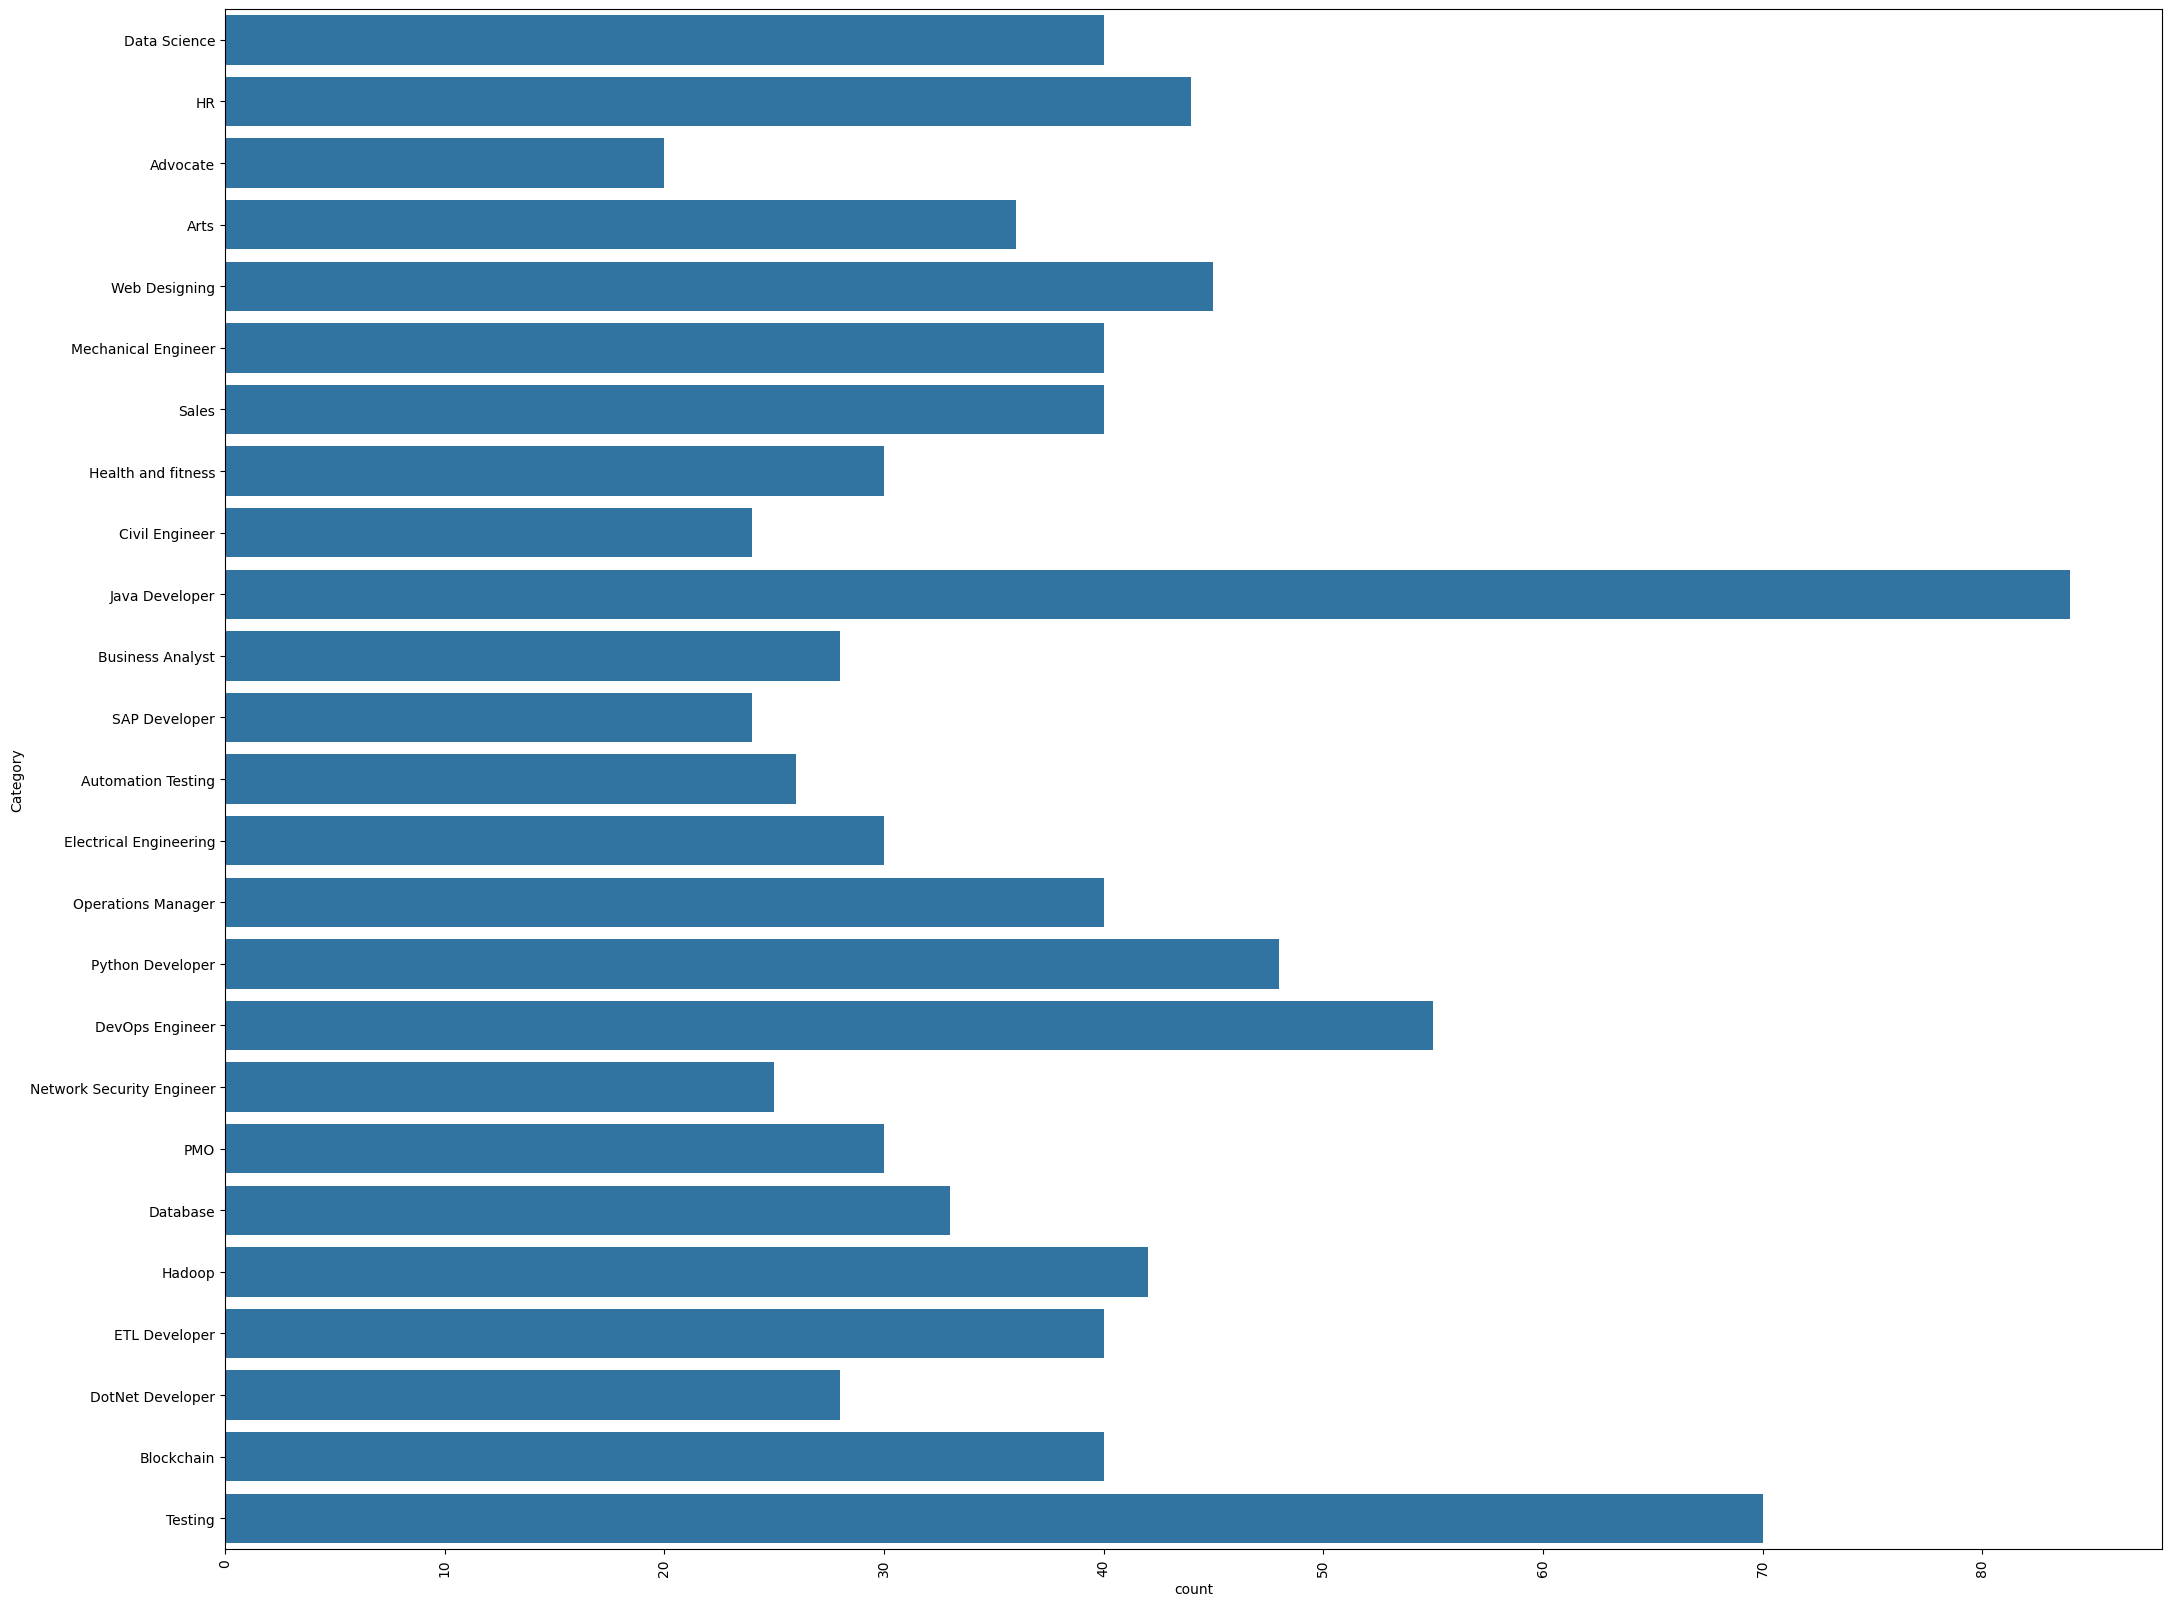

In [9]:
plt.figure(figsize=(25,20))
plt.xticks(rotation=90) # just to rotate on 90 degree
sns.countplot(df['Category']) # visualize highest number of category
plt.show()

In [10]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

**Data Cleaning**

In [11]:
# remove URLS,mentions and Hastags
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt) # means I have to replace http along with their associated text by replacing space
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) # for removing special characters
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [12]:
cleanResume("my ##akarsh $ website like this https://www.google.com and access it @gmail.com")

'my website like this and a ess it '

In [13]:
df['Resume']=df['Resume'].apply(lambda x:cleanResume(x)) # we have used lambda function to apply this cleaning for whole resume rows

In [14]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

**Convert category into numerical form**

In [15]:
# As this is the multiclass classification problem because of so many categories
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder() # Initialization
df['Category']=label.fit_transform(df['Category'])

In [16]:
df['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

In [17]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

**Convert words into vectors from Resume Column and remove stopwords**

In [18]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [19]:
# we will use tf-idf vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english') # we have to remove stopwords here of english language

tfidf_matrix=tfidf.fit_transform(df['Resume'])

In [20]:
tfidf_matrix

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [21]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


**Split the data into train-test split**

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(tfidf_matrix,df['Category'],test_size=0.2,random_state=42) # tfidf matrix is input and df['ctegory'] is the output.

In [23]:
X_train.shape

(769, 7351)

In [24]:
X_test.shape

(193, 7351)

In [25]:
y_train.shape

(769,)

In [26]:
y_test.shape

(193,)

**Let's Train the model**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score


clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train) # for training
ypred=clf.predict(X_test) # for testing
print(accuracy_score(y_test,ypred))

0.9844559585492227


**Save the model**

In [28]:
import pickle

pickle.dump(tfidf,open('tfidf.pkl','wb')) # wb is write binary mode
pickle.dump(clf,open('model.pkl','wb'))

**Prediction System**

In [29]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [30]:
import pickle

# load the trained classifier
clf=pickle.load(open('model.pkl','rb'))

# clean the input resume
cleanedResume=cleanResume(myresume)

# Transform the cleaned resume using the trained tfidf vectorizer
input_features=tfidf.transform([cleanedResume])

# Make predictions using the trained classifier
prediction=clf.predict(input_features)[0]

# Map category ID to category name , this is a dictionary
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction, "Unknown")

print("Predicted Category:", category_name)
print(prediction)

Predicted Category: Data Science
6


**Deployment on Streamlit (app.py file)**

In [32]:
!pip install streamlit
import streamlit as st
import pickle
import re
import nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


In [33]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
# loading model

clf=pickle.load(open('model.pkl','rb')) # rb read binary mode for loading data
tfidf=pickle.load(open('tfidf.pkl','rb'))

def cleanResume(resume_txt):
    cleanText = re.sub('http\S+\s', ' ', txt) # means I have to replace http along with their associated text by replacing space
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) # for removing special characters
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [43]:
# Create Web app

def main():
    st.title("Resume Screening App")
    upload_file=st.file_uploader("Upload Resume",type=['pdf','txt'])

    if upload_file is not None:
      try:
        resume_bytes=upload_file.read()
        resume_txt=resume_bytes.decode("utf-8")
      except UnicodeDecodeError:
        #if utf-8 decoding fail ,try decoding with latin-1
        resume_txt=resume_bytes.decode("latin-1")

    # clean the input resume
      cleanedResume=cleanResume(resume_txt)

# Transform the cleaned resume using the trained tfidf vectorizer
      input_features=tfidf.transform([cleanedResume])

# Make predictions using the trained classifier
      prediction_id=clf.predict(input_features)[0]
      st.write(prediction_id)
# Map category ID to category name
      category_mapping = {
          15: "Java Developer",
          23: "Testing",
           8: "DevOps Engineer",
          20: "Python Developer",
          24: "Web Designing",
          12: "HR",
          13: "Hadoop",
           3: "Blockchain",
          10: "ETL Developer",
          18: "Operations Manager",
           6: "Data Science",
          22: "Sales",
          16: "Mechanical Engineer",
           1: "Arts",
           7: "Database",
          11: "Electrical Engineering",
          14: "Health and fitness",
          19: "PMO",
           4: "Business Analyst",
           9: "DotNet Developer",
           2: "Automation Testing",
          17: "Network Security Engineer",
          21: "SAP Developer",
           5: "Civil Engineer",
           0: "Advocate",
      }

      category_name = category_mapping.get(prediction_id, "Unknown")

      st.write("Predicted Category:", category_name)



# python main
if __name__ == "__main__":
    main()